Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

Ans. In machine learning, especially in the context of Support Vector Machines (SVMs), the relationship between polynomial functions and kernel functions is significant. Kernel functions provide a way to implicitly map input data into a higher-dimensional space without explicitly computing the transformation. Polynomial functions are a specific type of kernel function that introduces non-linearity through polynomial terms.

### Kernel Functions:

A kernel function \(K\) is a measure of similarity between pairs of data points. It computes the dot product of the mapped features in a higher-dimensional space without explicitly computing the transformation. The kernel trick allows algorithms to operate in the original feature space while effectively working with data in a higher-dimensional space.

### Polynomial Kernel:

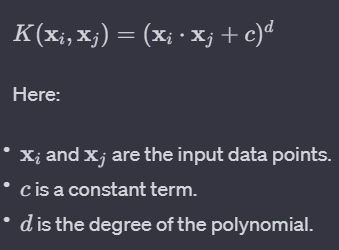

### Relationship:

1. **Polynomial Kernel as a Special Case:**
   - Polynomial functions are a special case of kernel functions. The polynomial kernel function is a way to introduce non-linearity by considering polynomial terms in the dot product of features.

2. **Handling Non-Linearity:**
   - Both polynomial functions and polynomial kernels are used to handle non-linear relationships in data. Polynomial kernels allow SVMs to capture non-linear decision boundaries without explicitly transforming the data into a higher-dimensional space.

3. **Degree of Non-Linearity:**
   - The degree \(d\) in the polynomial kernel determines the degree of non-linearity introduced. Higher degrees lead to more complex decision boundaries.

4. **Computational Efficiency:**
   - The kernel trick provides computational efficiency by avoiding the explicit computation of the feature transformation. This is particularly advantageous when dealing with high-dimensional or infinite-dimensional feature spaces.



In [3]:
pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 2.4 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python310\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 14.8/14.8 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1


Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Ans. 
To implement a Support Vector Machine (SVM) with a polynomial kernel in Python using Scikit-learn, you can use the SVC (Support Vector Classification) class with the kernel='poly' option. Here's a simple example:

Accuracy: 0.7333333333333333


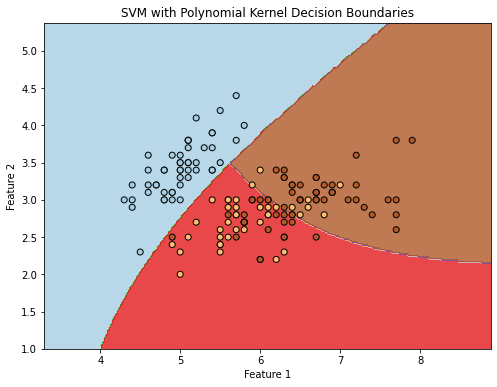

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a dataset (for example, the Iris dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features for simplicity
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM with a polynomial kernel
svm_model = SVC(kernel='poly', degree=3, coef0=1, C=1.0)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot decision boundaries
plt.figure(figsize=(8, 6))
h = .02  # Step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel Decision Boundaries')
plt.show()


Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

Ans. In the context of Support Vector Regression (SVR), epsilon (ε) is a hyperparameter that defines the width of the margin around the regression line within which no penalty is incurred. It is often associated with the tube around the predicted values. SVR aims to fit as many data points as possible within this tube, while still minimizing the error.

When you increase the value of epsilon in SVR, you are essentially allowing a wider tube. This means that data points can be farther from the regression line and still not contribute to the error. As a result, the SVR model becomes more tolerant to errors, and more data points may fall within the wider margin without incurring a penalty.

The number of support vectors in SVR is influenced by the width of the tube. As you increase epsilon, more data points can be considered as support vectors because they are allowed to be farther from the regression line without affecting the model's performance. Conversely, if you decrease epsilon, the tube becomes narrower, and the SVR model becomes less tolerant to errors, leading to fewer support vectors.

In summary, increasing the value of epsilon in SVR generally increases the number of support vectors, as it allows for a wider margin around the regression line, making the model more flexible and tolerant to deviations from the predicted values.

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

Ans. Support Vector Regression (SVR) has several hyperparameters that significantly influence its performance. Let's discuss the impact of the kernel function, C parameter, epsilon parameter, and gamma parameter:

1. **Kernel Function:**
   - **Role:** The kernel function determines the type of decision boundary used in SVR. Common choices include linear, polynomial, radial basis function (RBF or Gaussian), and sigmoid.
   - **Effect:** The choice of the kernel function affects the model's ability to capture complex patterns in the data.
   - **Example:**
     - Use a linear kernel when the relationship between input features and the target variable is approximately linear.
     - Choose RBF or polynomial kernels for non-linear relationships.

2. **C Parameter:**
   - **Role:** The C parameter controls the trade-off between achieving a smooth fit and minimizing the training error. It is the regularization parameter.
   - **Effect:** A smaller C encourages a smoother fit by allowing more errors (soft margin), while a larger C penalizes errors more heavily, resulting in a more tightly fitted model (hard margin).
   - **Example:**
     - Increase C if you suspect the model is underfitting and needs to fit the training data more closely.
     - Decrease C if you want to increase the model's tolerance to errors and prevent overfitting.

3. **Epsilon Parameter (ε):**
   - **Role:** Epsilon defines the width of the margin of the SVR. It sets a threshold for the model to consider errors within this margin as acceptable.
   - **Effect:** A larger epsilon allows for a wider margin, making the model more tolerant to errors within the margin.
   - **Example:**
     - Increase epsilon if you want to allow for more errors within the margin and have a more flexible model.
     - Decrease epsilon if you want to enforce a stricter adherence to the predicted values.

4. **Gamma Parameter:**
   - **Role:** Gamma determines the influence of a single training example and indirectly controls the shape of the decision boundary. It is specific to RBF and polynomial kernels.
   - **Effect:** A small gamma results in a broader decision boundary, and a large gamma makes the decision boundary more sensitive to individual data points.
   - **Example:**
     - Increase gamma if the model is underfitting and you want a more complex decision boundary.
     - Decrease gamma if the model is overfitting and you want a smoother decision boundary.




Q5. Assignment:
• Import the necessary libraries and load the dataset
• Split the dataset into training and testing sets
• Preprocess the data using any technique of your choice (e.g. scaling, normalization)
• Create an instance of the SVC classifier and train it on the training data
• Use the trained classifier to predict the labels of the testing data
• Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score)
• Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomizedSearchCV to improve its performance
• Train the tuned classifier on the entire dataset
• Save the trained classifier to a file for future use.

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc = SVC()

# Train the classifier on the training data
svc.fit(X_train_scaled, y_train)

# Use the trained classifier to predict the labels of the testing data
y_pred = svc.predict(X_test_scaled)

# Evaluate the performance of the classifier (using accuracy as an example)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print additional classification metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the tuned classifier on the entire dataset
tuned_svc = SVC(**best_params)
tuned_svc.fit(X_train_scaled, y_train)

# Save the trained classifier to a file
joblib.dump(tuned_svc, 'tuned_svc_model.pkl')


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


['tuned_svc_model.pkl']